In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv(r"/content/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# What is the distribution of age among heart failure patients in the dataset

In [14]:
X=df[df['DEATH_EVENT']==1]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<Axes: xlabel='age', ylabel='Density'>

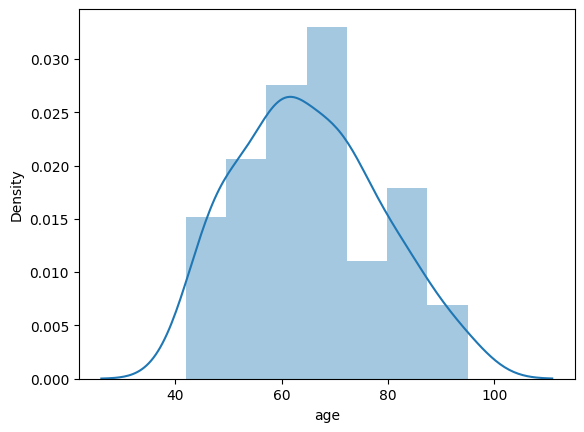

In [15]:
sns.distplot(X.age)

#How does the death rate vary with age

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

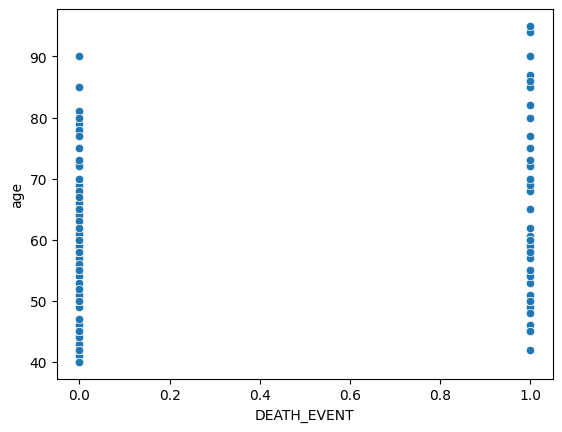

In [65]:
sns.scatterplot(x=df['DEATH_EVENT'],y=df['age']) #Insights: Death rate is less than between age 50 and 70

#What is the percentage of male and female patients in the dataset?

In [22]:
df['sex'].value_counts(normalize=True)

sex
1    0.648829
0    0.351171
Name: proportion, dtype: float64

# How does the platelet count vary among different age groups?

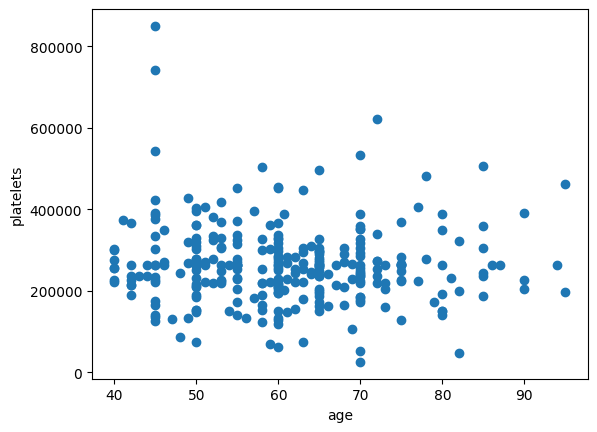

In [66]:
plt.scatter(df['age'],df['platelets'])
plt.xlabel('age')
plt.ylabel('platelets')
plt.show()
#Insights : for almost all age groups platelets counts is between 2lacs to 4lacs

#Is there any correlation between creatinine and sodium levels in the blood?

In [27]:
X=df[['serum_creatinine','serum_sodium']]
X.corr()    # There is no correlation between creatinine and sodium levels in the blood

,serum_creatinine,serum_sodium
serum_creatinine,1.000000,-0.189095
serum_sodium,-0.189095,1.000000


#How does the prelevance of high blood pressure differ between male and female patients?

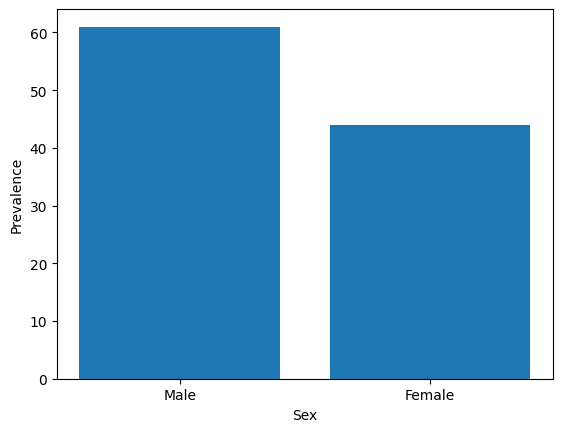

In [76]:
prevalence_male = df[(df['sex'] == 1) & (df['high_blood_pressure'] == 1)]
prevalence_female = df[(df['sex'] == 0) & (df['high_blood_pressure'] == 1)]
plt.bar(['Male', 'Female'], [len(prevalence_male), len(prevalence_female)])
plt.xlabel('Sex')
plt.ylabel('Prevalence')
plt.show()

#Relationship between smoking habit and occurence of heart failure?

In [62]:
X=df[['smoking','DEATH_EVENT']]
X.corr()

,smoking,DEATH_EVENT
smoking,1.000000,-0.012623
DEATH_EVENT,-0.012623,1.000000


#Are there any noticebale patterns between the death_events across various different age groups?

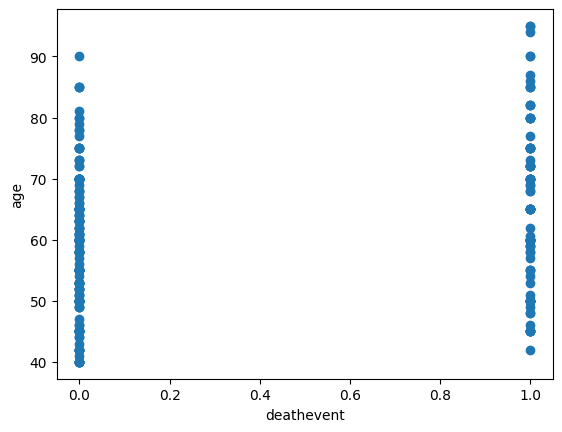

In [49]:
plt.scatter(df['DEATH_EVENT'],df['age'])
plt.xlabel('deathevent')
plt.ylabel('age')
plt.show() #Insights between 50 to 70 death rate is less

# Is there any significant difference in ejection fraction between patients with and without diabetes?

<Axes: xlabel='diabetes', ylabel='ejection_fraction'>

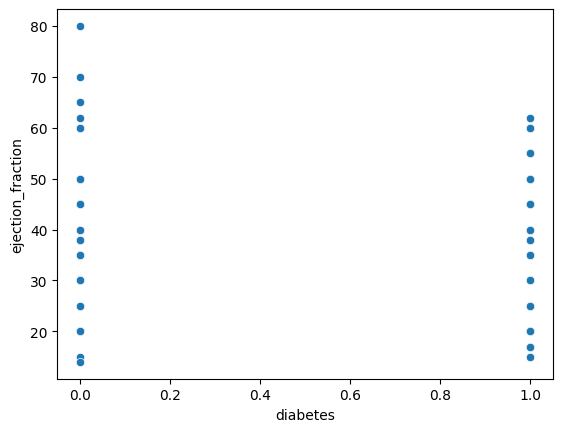

In [67]:
sns.scatterplot(x=df['diabetes'],y=df['ejection_fraction']) #patient without diabetes has the highest ejection fraction
#There is no significant difference in ejection fraction between patients with and without diabetes.

In [78]:
X=df[df['diabetes']==1]
X.ejection_fraction.mean()

38.016

In [79]:
Y=df[df['diabetes']==0]
Y.ejection_fraction.mean()

38.132183908045974

In [93]:
df.groupby('diabetes')['ejection_fraction'].mean()

diabetes
0    38.132184
1    38.016000
Name: ejection_fraction, dtype: float64

In [81]:
#Insights:There is no significant difference in ejection fraction between patients with and without diabetes

#how does serum creatinine level vary between patients who survived and those who did not?

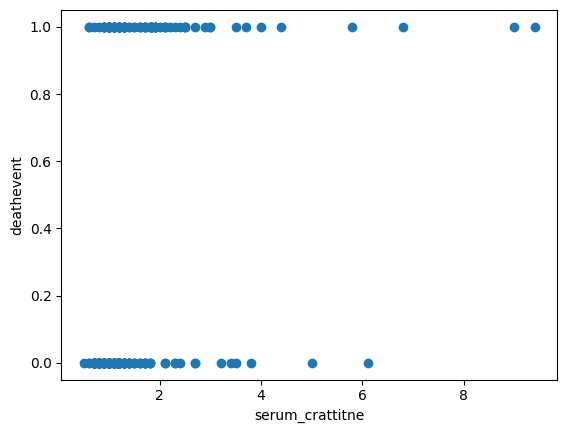

In [58]:
plt.scatter(df['serum_creatinine'],df['DEATH_EVENT'])
plt.xlabel('serum_crattitne')
plt.ylabel('deathevent')
plt.show()
#Serum creatiine is highest for the patient who did not survived

In [82]:
X=df[df['DEATH_EVENT']==1]
X.serum_creatinine.mean()

1.8358333333333334

In [83]:
Y=X=df[df['DEATH_EVENT']==0]
Y.serum_creatinine.mean()

1.1848768472906404

In [91]:
df.groupby('DEATH_EVENT')['serum_creatinine'].mean()

DEATH_EVENT
0    1.184877
1    1.835833
Name: serum_creatinine, dtype: float64

In [87]:
#Insights : Serum creatitine is high for the patients who died